In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import rcParams

In [19]:
# concentrate Ebike data and E4 data in one csv file 
df1 = pd.read_csv("export_EBikedata.csv")
df2 = pd.read_csv("bpm_data.csv")
df3 = pd.read_csv("eda_data.csv")




## EBike + BPM

merged_bpm = df1.merge(df2, on="time", how="outer").fillna("")
merged_bpm.replace("", np.nan, inplace=True)            
merged_bpm.dropna(axis=0, how='any',inplace=True)
print(merged_bpm)
#merged.to_csv("merged.csv", index=False)

gp_bpm = merged_bpm.groupby(by=['D5_humanPower','d5_bpm'])
gp_bpm = gp_bpm.size().reset_index(name='frequence')
# probabilities 
gp_bpm['frequence'] /= len(merged_bpm)
merged_bpm = merged_bpm.merge(gp_bpm, on=['D5_humanPower','d5_bpm'], how="outer").fillna("")
merged_bpm.to_csv("merged_bpm.csv", index=False)





## Ebike + EDA

merged_eda = df1.merge(df3, on="time", how="outer").fillna("")
merged_eda.replace("", np.nan, inplace=True)            
merged_eda.dropna(axis=0, how='any',inplace=True)
print(merged_eda)
#merged.to_csv("merged.csv", index=False)

gp_eda = merged_eda.groupby(by=['D5_humanPower','d005_EDA'])
gp_eda = gp_eda.size().reset_index(name='frequence')
# probabilities 
gp_eda['frequence'] /= len(merged_eda)
merged_eda = merged_eda.merge(gp_eda, on=['D5_humanPower','d005_EDA'], how="outer").fillna("")
merged_eda.to_csv("merged_eda.csv", index=False)








## EBike + BPM + EDA

merged_bpm_eda = df1.merge(df2, on="time", how="outer").fillna("")
merged_bpm_eda = merged_bpm_eda.merge(df3, on="time", how="outer").fillna("")
merged_bpm_eda.replace("", np.nan, inplace=True)            
merged_bpm_eda.dropna(axis=0, how='any',inplace=True)

gp_bpm_eda = merged_bpm_eda.groupby(by=['D5_humanPower','d5_bpm'])
gp_bpm_eda = gp_bpm_eda.size().reset_index(name='frequence')
# probabilities 
gp_bpm_eda['frequence'] /= len(merged_bpm_eda)
merged_bpm_eda = merged_bpm_eda.merge(gp_bpm_eda, on=['D5_humanPower','d5_bpm'], how="outer").fillna("")
merged_bpm_eda.to_csv("merged_bpm_eda.csv", index=False)

                 time  average_humanPower  D5_humanPower  \
37   2019-08-30-15-20            0.000000            0.0   
38   2019-08-30-15-21            0.000000            0.0   
39   2019-08-30-15-22            0.000000            0.0   
43   2019-08-30-15-26           18.086207            3.0   
44   2019-08-30-15-27           44.120690            8.0   
45   2019-08-30-15-28           54.431034           10.0   
46   2019-08-30-15-29           92.913793           18.0   
50   2019-08-30-15-33           40.689655            8.0   
51   2019-08-30-15-34           15.454545            3.0   
52   2019-08-30-15-35           46.396552            9.0   
53   2019-08-30-15-37           47.029412            9.0   
55   2019-08-30-15-39            0.931034            0.0   
56   2019-08-30-15-40            0.000000            0.0   
57   2019-08-30-15-41            0.000000            0.0   
58   2019-08-30-15-42            0.000000            0.0   
59   2019-08-30-15-43            0.00000

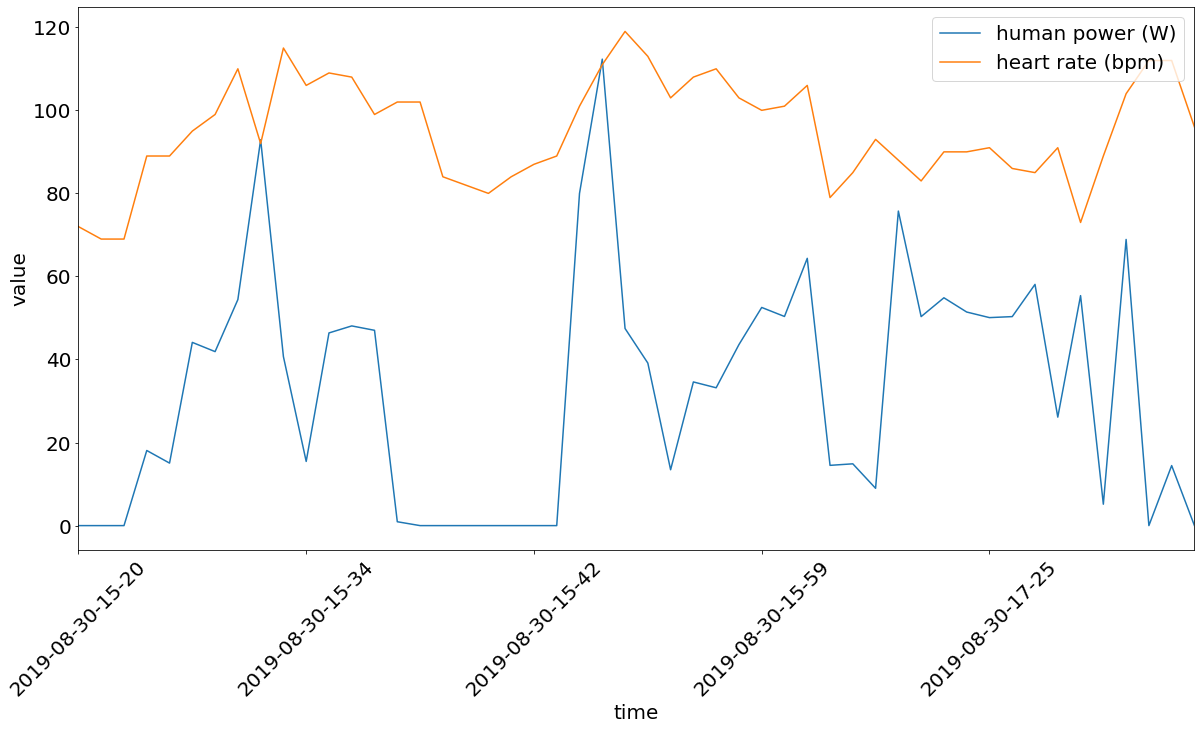

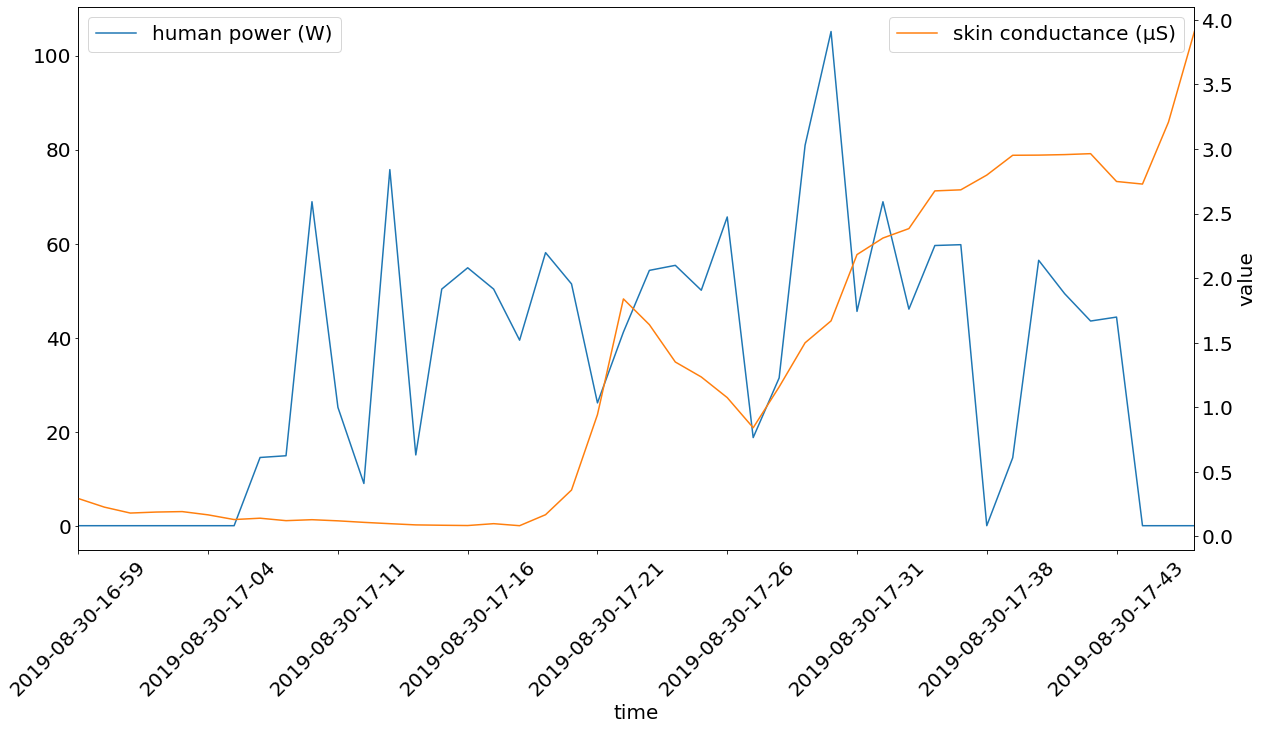

In [102]:
# 2d plot

# bpm/power verus time

merged_bpm.plot(x="time", y=["average_humanPower", "bpm"],label = ["human power (W)", "heart rate (bpm)"],figsize = (20,10),fontsize=20)
#ax = merged_bpm.plot(x="time", y="average_humanPower",label = "human power",figsize = (20,10))
#merged_bpm.plot("time","bpm",label = "bpm",secondary_y=True, ax=ax)

plt.tick_params(axis='x', rotation=45)
#plt.title('bpm/power verus time',fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('value',fontsize=20)
plt.legend(loc='upper right',fontsize=20)
plt.show()

# eda/power verus time

#merged_eda.plot(x="time", y=["average_humanPower", "aveEDA"],label = ["human power", "eda"],figsize = (20,10),secondary_y=True)
ax = merged_eda.plot(x="time", y="average_humanPower",label = "human power (W)",figsize = (20,10))

merged_eda.plot("time","aveEDA",label = "skin conductance (μS)",secondary_y=True, ax=ax,fontsize=20)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.label.set_size(20)
ax.legend(loc='upper left',fontsize=20)
#plt.title('eda/power verus time',fontsize=20)
plt.xlabel('time')
plt.ylabel('value',fontsize=20)
plt.legend(loc='upper right',fontsize=20)


plt.show()


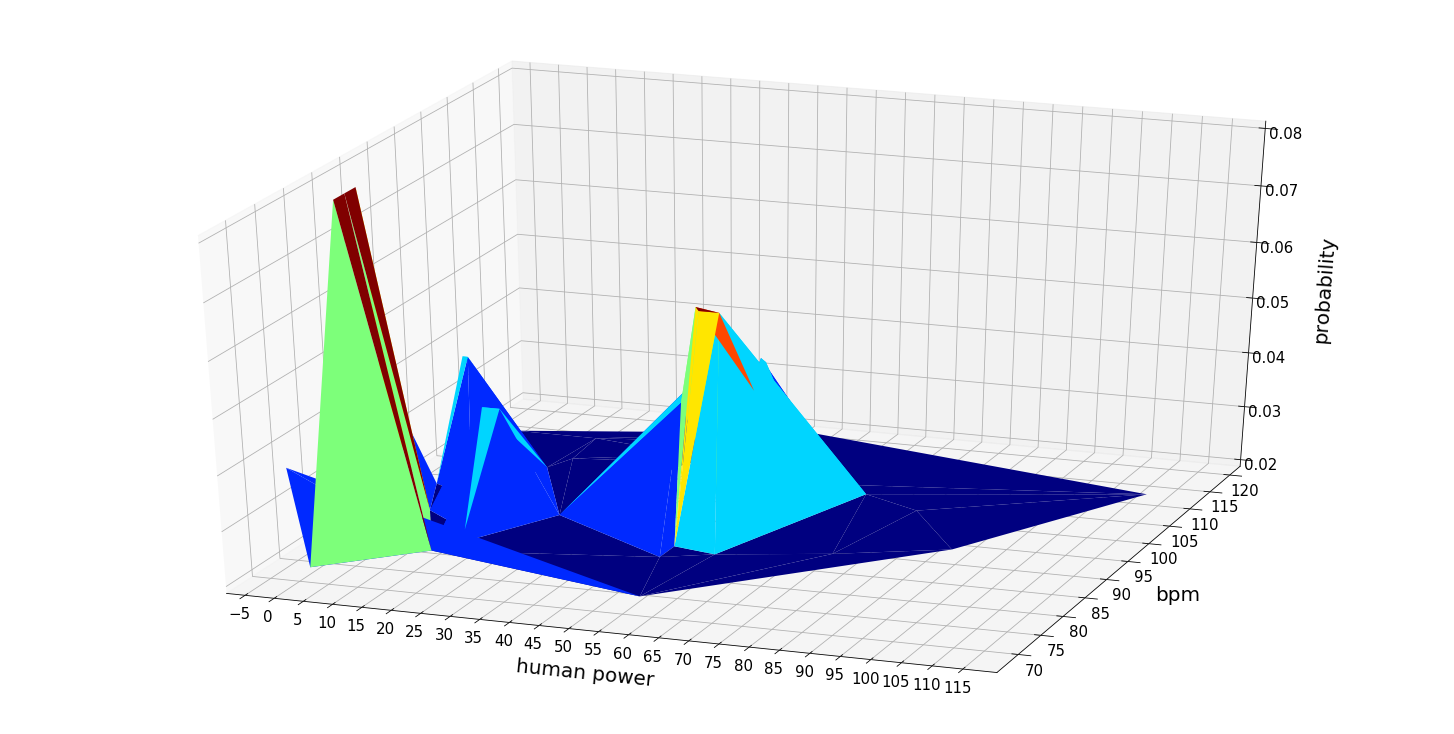

In [179]:
# 3d Plot trisurf
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test,azim = -70)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.plot_trisurf(merged_bpm.average_humanPower, merged_bpm.bpm,merged_bpm.frequence, cmap=cm.jet, linewidth=0.2)

#plt.title('Probability of HR-HP pairing')

# set tick
test_ax.xaxis.set_tick_params(labelsize=15)
test_ax.yaxis.set_tick_params(labelsize=15)
test_ax.zaxis.set_tick_params(labelsize=15)

test_ax.xaxis.set_major_locator(MultipleLocator(5))
test_ax.yaxis.set_major_locator(MultipleLocator(5))

# set label
test_ax.set_xlabel('human power',fontsize=20)
test_ax.set_ylabel('bpm',fontsize=20,)
test_ax.set_zlabel('probability',fontsize=20)

plt.rcParams['axes.labelpad'] = 10

plt.show()

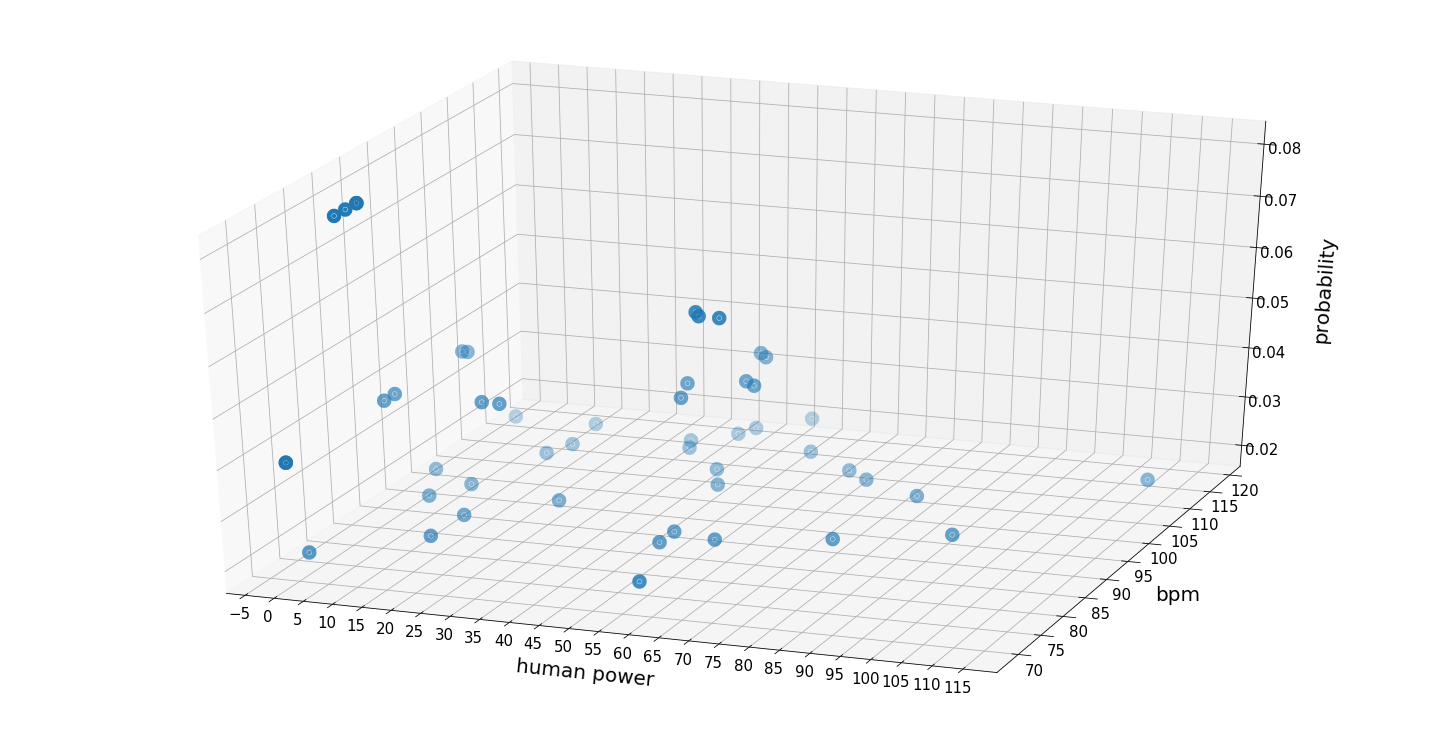

In [130]:
# 3d Plot scatter
# Approach 1

test = plt.figure(figsize = (20,10))
test_ax = Axes3D(test,azim = -70)
#test_ax.plot_trisurf(gp.D5_humanPower*5, gp.d5_bpm*5, gp.frequence, cmap=cm.jet, linewidth=0.2)
test_ax.scatter(merged_bpm.average_humanPower, merged_bpm.bpm,merged_bpm.frequence, cmap=plt.cm.rainbow, linewidth=10)

#plt.title('Probability of HR-HP pairing')

# set tick
test_ax.xaxis.set_tick_params(labelsize=15)
test_ax.yaxis.set_tick_params(labelsize=15)
test_ax.zaxis.set_tick_params(labelsize=15)

test_ax.xaxis.set_major_locator(MultipleLocator(5))
test_ax.yaxis.set_major_locator(MultipleLocator(5))

# set label
test_ax.set_xlabel('human power',fontsize=20)
test_ax.set_ylabel('bpm',fontsize=20,)
test_ax.set_zlabel('probability',fontsize=20)

plt.rcParams['axes.labelpad'] = 20

plt.show()

[[1.82584806e-04 7.65416592e-05 2.35247189e-05 ... 1.58549071e-04
  1.87529063e-04 5.18889678e-05]
 [1.33551961e-04 9.50938004e-05 1.14644534e-04 ... 2.61025184e-05
  1.42839800e-05 1.97608985e-04]
 [9.00068225e-05 1.12682215e-04 3.26837601e-05 ... 1.33406073e-04
  6.36246040e-05 1.38666085e-04]
 ...
 [7.74528949e-05 6.97471730e-05 2.27509084e-05 ... 4.64082478e-05
  7.27544205e-05 1.20992836e-04]
 [9.23049345e-05 5.28518264e-05 1.72087737e-04 ... 2.13998385e-05
  3.29185969e-05 2.78681549e-05]
 [7.16523520e-05 5.36062914e-05 1.07024568e-04 ... 1.90685138e-05
  1.25587190e-04 1.77124331e-04]]


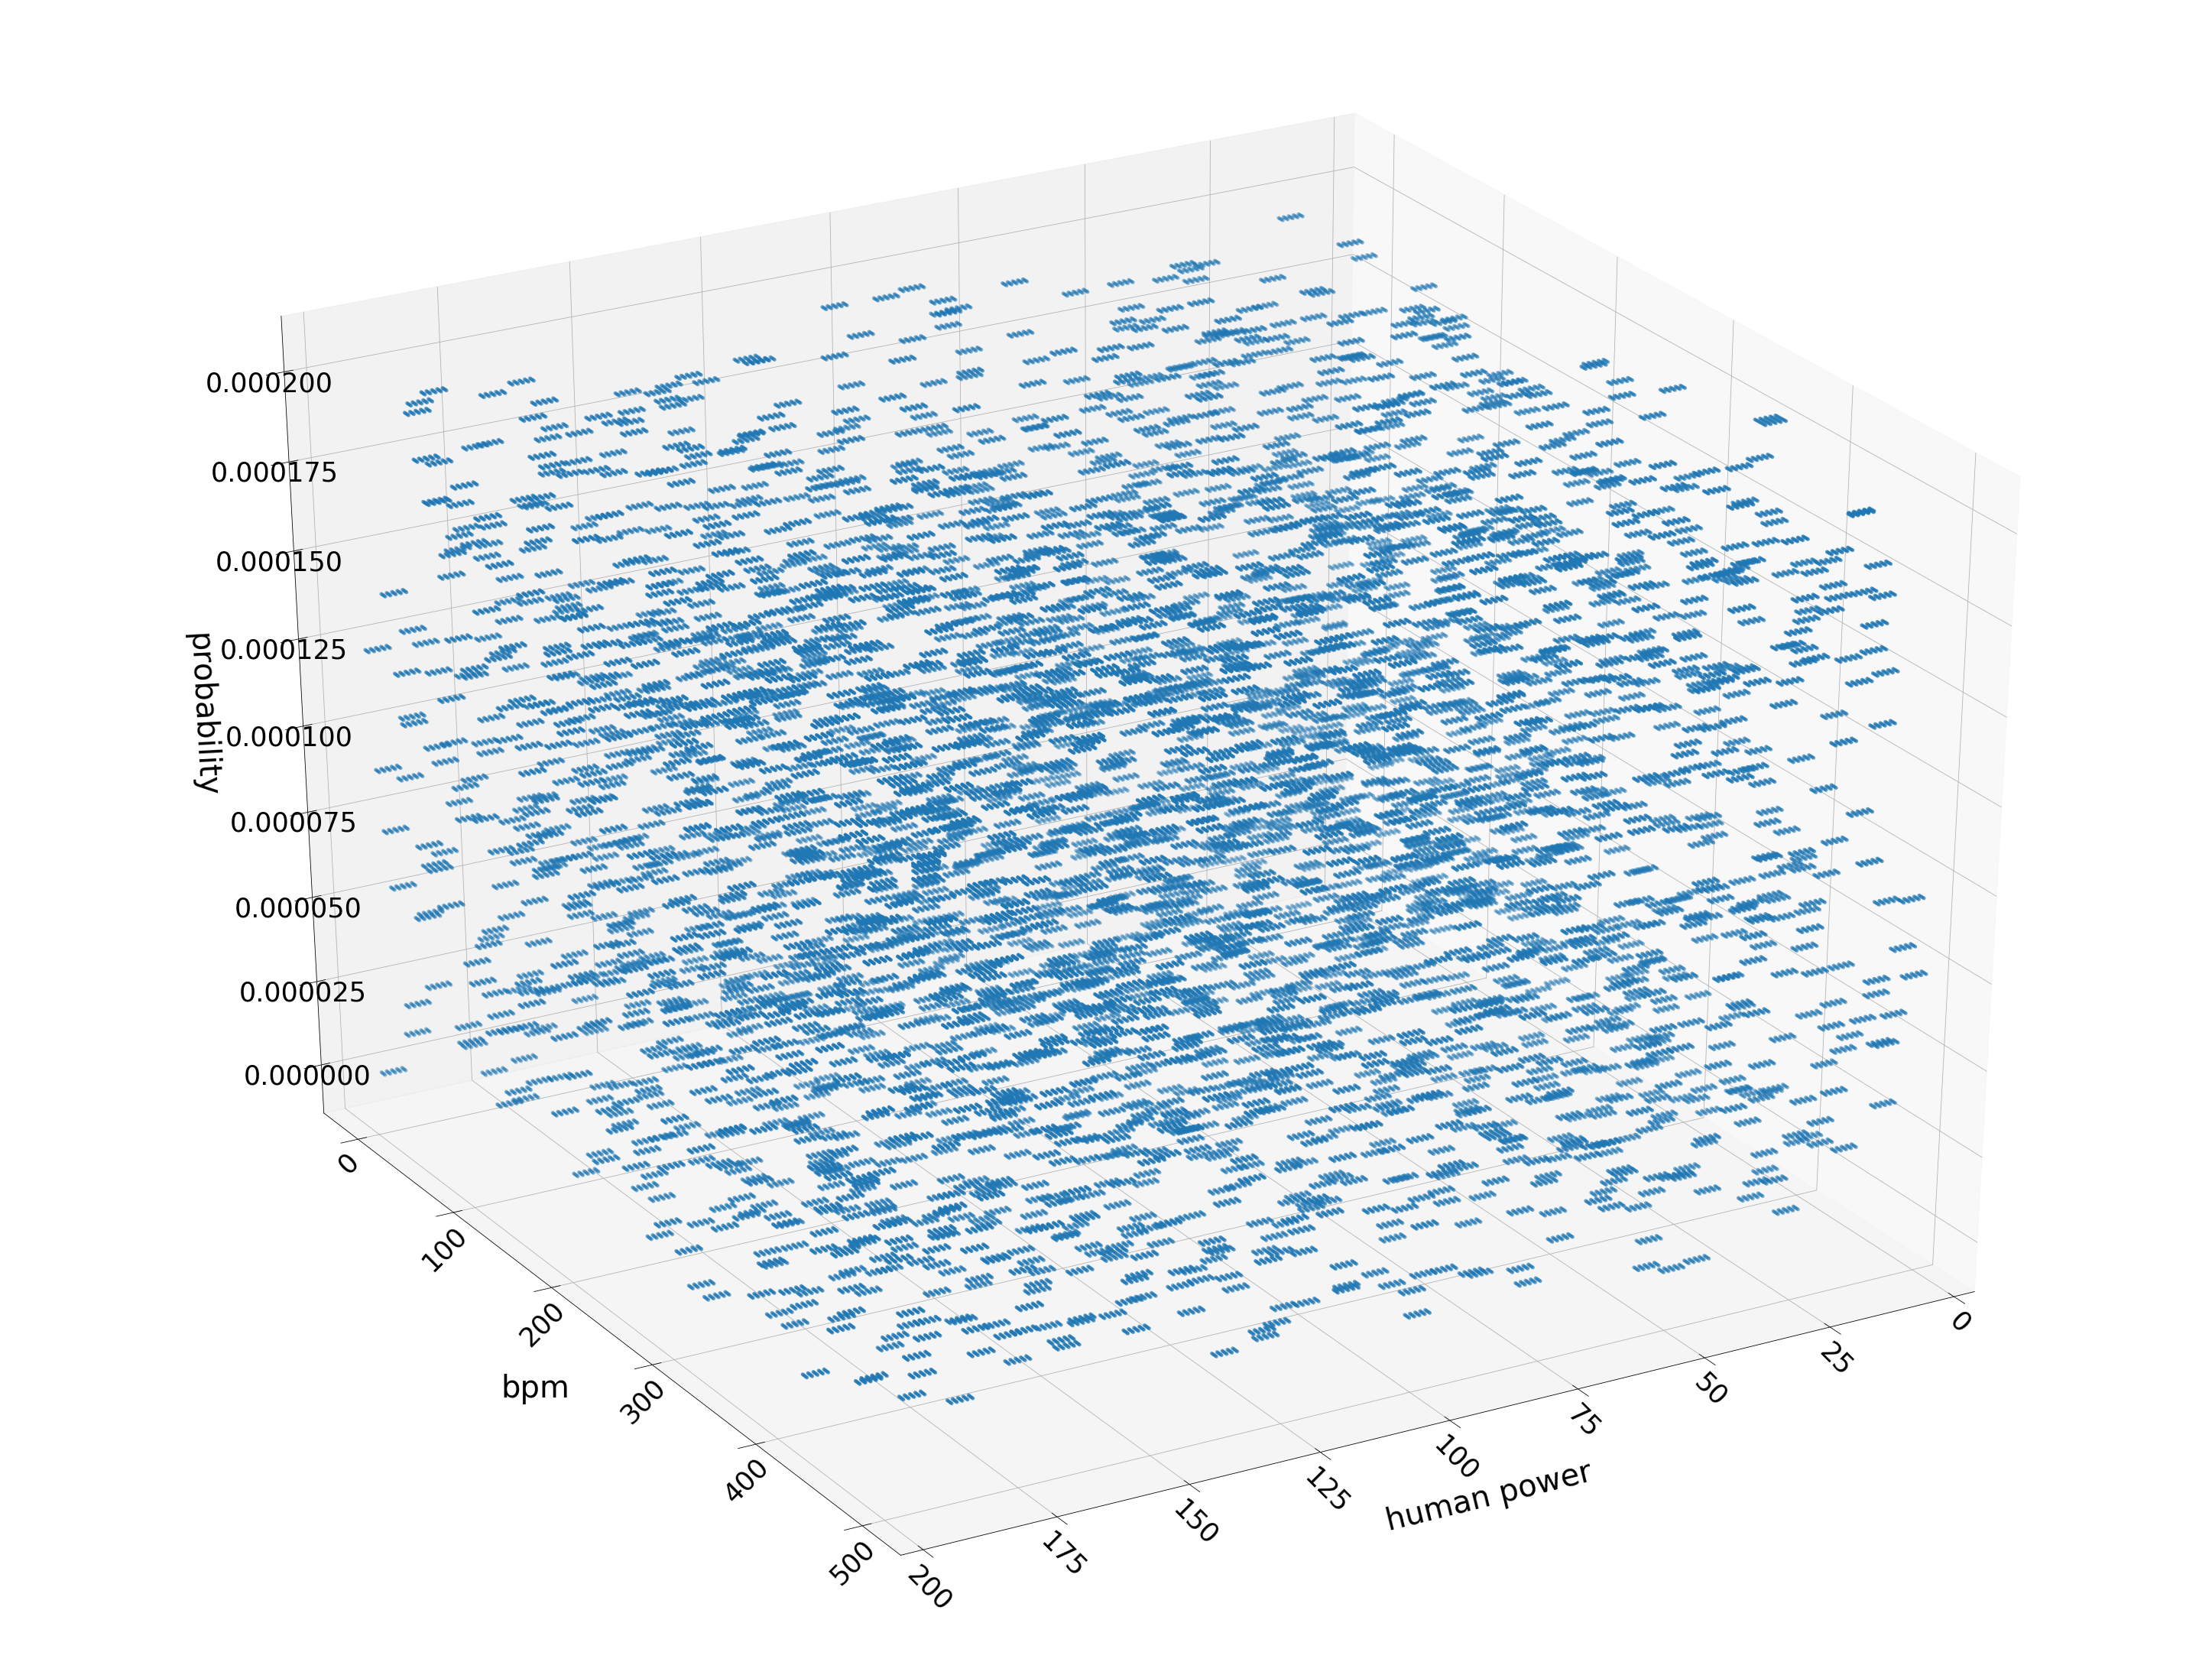

In [189]:
# 3d Plot scatter
# Approach 2
#https://blog.csdn.net/yanyanyufei96/article/details/70171887
a = np.arange(0,10000,1).reshape(100,100)
a = np.random.rand(100,100)
a = a/(a.sum())
print(a)
np.savetxt('trytry.csv',a,delimiter = ',')

Matrix = np.zeros((500,500))
for n in range(0,40):
    for nn in range(0,100):
        for i in range(0,5):
            for j in range(0,5):
                Matrix[nn*5+j,n*5+i] = a[nn,n]
#print(Matrix)
df = pd.DataFrame(Matrix)
df.loc[:,200:].replace(0, np.nan, inplace=True)
#print(df)

y = df.index.values
x = df.columns.values
X,Y = np.meshgrid(x,y)
Z = Y*0+X*0+df.loc[df.index.values,df.columns[df.index.values]]

fig = plt.figure(figsize = (40,30))
axes3d = Axes3D(fig,azim = 60)

#axes3d.plot_surface(X, Y, Z,cmap=plt.cm.rainbow)
axes3d.scatter(X, Y, Z, cmap=plt.cm.rainbow, linewidth=0.2)

#plt.title('Probability of HR-HP pairing')

# set tick
axes3d.xaxis.set_tick_params(labelsize=35,rotation = -45)
axes3d.yaxis.set_tick_params(labelsize=35,rotation = 45)
axes3d.zaxis.set_tick_params(labelsize=35)

# set label
axes3d.set_xlabel('human power',fontsize=40)
axes3d.set_ylabel('bpm',fontsize=40)
axes3d.set_zlabel('probability',fontsize=40)

rcParams['axes.labelpad'] = 60


plt.xlim(0, 200)
plt.show()

In [24]:
import os
import csv
with open("PairsTemplate.csv", "a", newline='') as f:
    headers = ['D5_humanPower','d5_bpm']
    writer = csv.writer(f)

    if not os.path.getsize("PairsTemplate.csv"):         
        # print('no headers')
        writer.writerow(headers) # file doesn't exist yet, write a header

    for i in range(100):
        for j in range(100):
            writer.writerow([i,j])

    f.close()
    
df4 = pd.read_csv("PairsTemplate.csv")
merged_all = df4.merge(gp_bpm, on=['D5_humanPower','d5_bpm'], how="outer").fillna(np.nan)
merged_all.to_csv("PairsProbabilityba.csv", index=False)

In [25]:
b = merged_all['frequence'].as_matrix().reshape(100,100)

C:\Users\temp2015\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


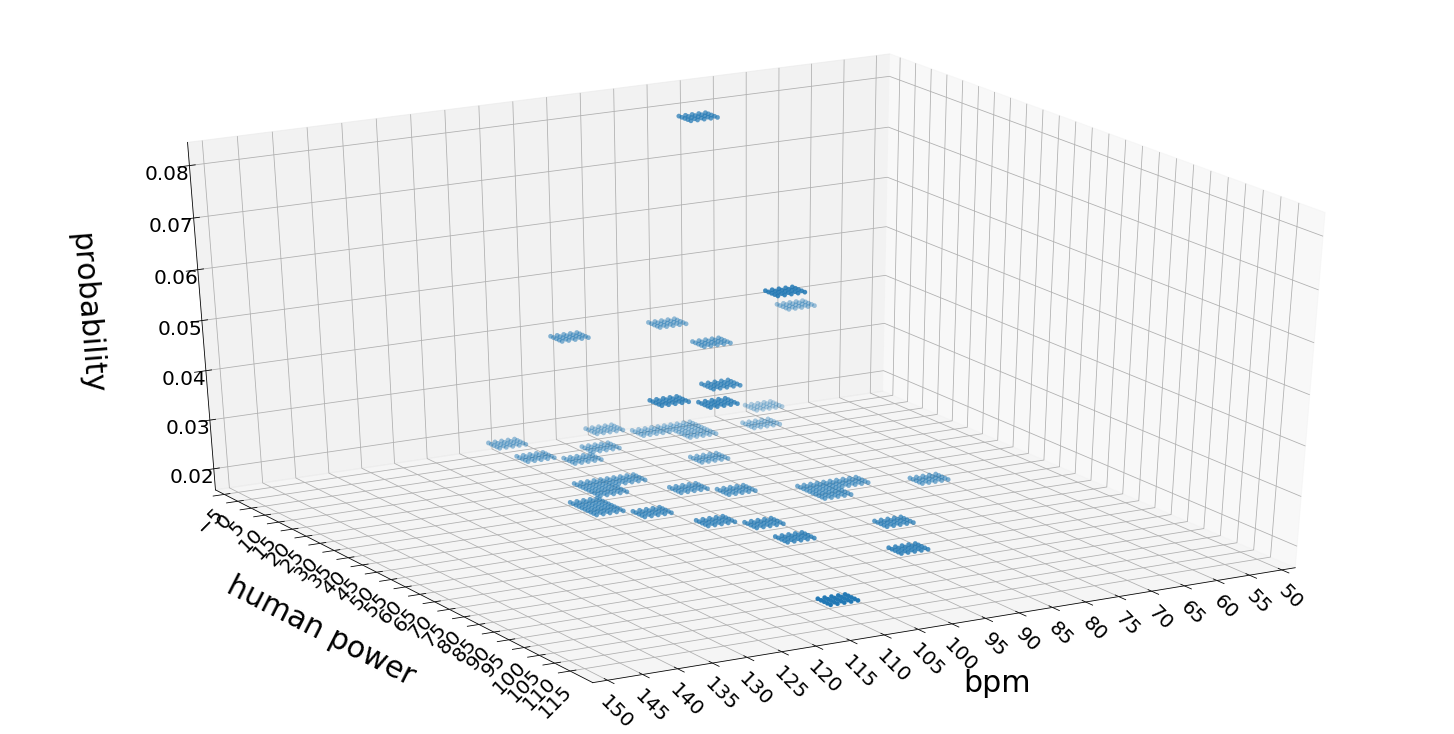

In [213]:
Matrix = np.zeros((500,500))
for n in range(0,40):
    for nn in range(0,100):
        for i in range(0,5):
            for j in range(0,5):
                Matrix[nn*5+j,n*5+i] = b[nn,n]
#print(Matrix)
df = pd.DataFrame(Matrix)
df.loc[:,200:].replace(0, np.nan, inplace=True)
#print(df)

y = df.index.values
x = df.columns.values
X,Y = np.meshgrid(x,y)
Z = Y*0+X*0+df.loc[df.index.values,df.columns[df.index.values]]

fig = plt.figure(figsize = (20,10))
axes3d = Axes3D(fig,azim = 60)

#axes3d.plot_surface(X, Y, Z,cmap=plt.cm.rainbow)
axes3d.scatter(X, Y, Z, cmap=plt.cm.rainbow, linewidth=0.2)
plt.xlim(50, 150)
#plt.title('Probability of HR-HP pairing')     


# set tick
axes3d.xaxis.set_tick_params(labelsize=20,rotation = -45)
axes3d.yaxis.set_tick_params(labelsize=20,rotation = 45)
axes3d.zaxis.set_tick_params(labelsize=20)

axes3d.xaxis.set_major_locator(MultipleLocator(5))
axes3d.yaxis.set_major_locator(MultipleLocator(5))

# set label
axes3d.set_xlabel('bpm',fontsize=30)
axes3d.set_ylabel('human power',fontsize=30,)
axes3d.set_zlabel('probability',fontsize=30)

rcParams['axes.labelpad'] = 40

plt.show()